In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.linalg import kron
import scipy as sp
import chi_sq as cs

In [2]:
plt.rcdefaults()
plt.rcParams.update({'figure.dpi':100})
plt.rcParams.update({'figure.autolayout':'True'})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })
plt.rc('legend',**{'fontsize':'x-small'})
#plt.figure(1,figsize = [11.0, 8.5])
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'xtick.top':'True'})
plt.rcParams.update({'ytick.right':'True'})
plt.rcParams.update({'axes.formatter.limits': (-2, 2)})
# My own adds to Carles' rcParams updates
#plt.rcParams.update({'lines.markersize': 8}) 6 is the default
plt.rcParams.update({'legend.framealpha': 1.0})
plt.rcParams.update({'legend.fancybox': 'False'})

#################### photo_z / i-band magnitude bins ###################

pz_ranges = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, np.inf])
im_ranges = np.array([17, 18, 19, 20, 21, 22, 23, np.inf])
colorwheel = ['blue', 'red', 'green', 
              'orange', 'teal', 'purple', 
              'cyan', 'pink', 'olive']
colorwheel_dash = ['b--', 'r--', 'g--', 'y--']

########################## import data info ############################

ng_col_names = ['r_nom', 'meanr', 'meanlogr', 
                'gamT', 'gamX', 'sigma', 
                'weight', 'npairs']
ng_col_formats = ['f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8']

nn_col_names = ['r_nom', 'meanr', 'meanlogr', 
                'xi', 'sigma_xi', 
                'DD', 'RR', 'DR', 'npairs']
nn_col_formats = ['f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8']

In [3]:
data_ng_paths = cs.data_path_builder('NG', 'main', pz_ranges[1:-3])
data_nn_paths = cs.data_path_builder('NN', 'main', pz_ranges[1:-2])

data_ng_cov_paths = cs.data_path_builder('NG', 'cov', pz_ranges[1:-3])
data_nn_cov_paths = cs.data_path_builder('NN', 'cov', pz_ranges[1:-2])

theo_ng_theta_paths = cs.theo_path_builder('NG', 'theta', pz_ranges[1:-3])
theo_nn_theta_paths = cs.theo_path_builder('NN', 'theta', pz_ranges[1:-2])

theo_ng_xi_paths = cs.theo_path_builder('NG', 'xi', pz_ranges[1:-3])
theo_nn_xi_paths = cs.theo_path_builder('NN', 'xi', pz_ranges[1:-2])

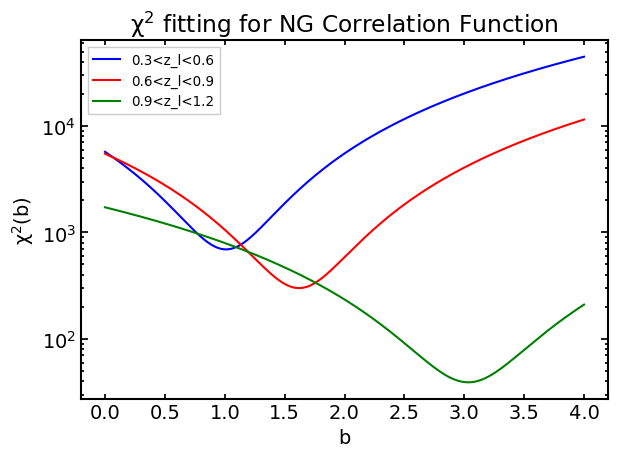

In [4]:
ng_min_b_full, ng_min_chi_full = cs.get_chi_sq_plots('NG', pz_ranges[1:-3], 'full')

In [5]:
print('NG corr min chi_sq:', ng_min_chi_full)
print('NG corr corresponding b:', ng_min_b_full)

NG corr min chi_sq: [693.13715513 300.03498901  39.11001899]
NG corr corresponding b: [1.01002004 1.61923848 3.03006012]


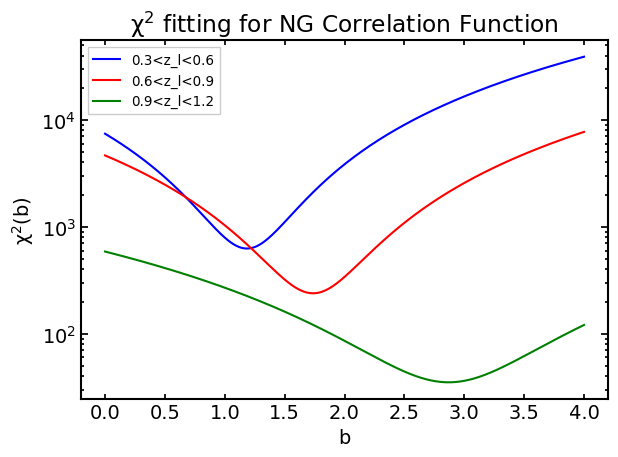

In [6]:
ng_min_b_diag, ng_min_chi_diag = cs.get_chi_sq_plots('NG', pz_ranges[1:-3], 'diag')

In [7]:
print('NG corr min chi_sq:', ng_min_chi_diag)
print('NG corr corresponding b:', ng_min_b_diag)

NG corr min chi_sq: [626.18731099 238.71908091  35.07527449]
NG corr corresponding b: [1.18637275 1.73947896 2.86973948]


In [8]:
def plot_b_chi_sq(corr, ax, b, pz_range, cov_prpt, color_wheel):
    for i in range(len(pz_range)):
        label = '{:.1f}<z_l<{:.1f}'.format(pz_range[i], pz_range[i]+0.3)
        r_data, xi_data, xi_sig, cov = cs.get_data(corr, i, cov_prpt=cov_prpt)
        r_theo, xi_theo = cs.get_theo(corr, i)
        f = interpolate.interp1d(r_theo, xi_theo)
        xi_theo_interp = f(r_data)
        if (corr == 'NG'):
            xi_model_mat = b[:,None]@xi_theo_interp[:,None].T
        elif (corr == 'NN'):
            xi_model_mat = (b**2)[:,None]@xi_theo_interp[:,None].T
        chi_sqs = np.ones(len(b))
        for j in range(len(b)):
            xi_model = xi_model_mat[j]
            chi_sq = cs.get_chi_sq(xi_data, xi_model, cov)
            chi_sqs[j] = chi_sq
        cs.plot_chi_sq(ax, b, chi_sqs, label, color_wheel[i])

In [9]:
def compare_chi_sq(corr, pz_range):
    b = np.linspace(0, 4, 500)
    fig, ax = plt.subplots(1, 1)
    plot_b_chi_sq(corr, ax, b, pz_range, 'full', colorwheel)
    ax.legend()
    ax.set_title(r'$\chi^2$ fitting for NG Correlation Function')
    plot_b_chi_sq(corr, ax, b, pz_range, 'diag', colorwheel_dash)
    return

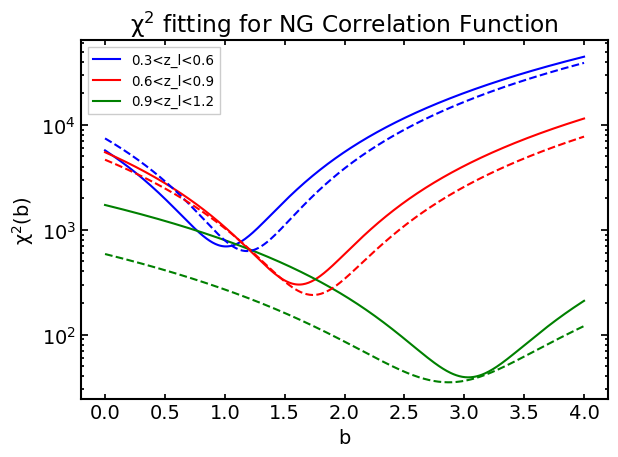

In [10]:
compare_chi_sq('NG', pz_ranges[1:-3])

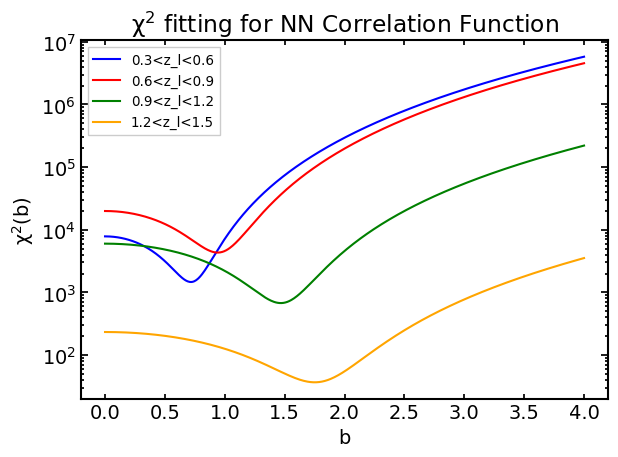

In [11]:
nn_min_b_full, nn_min_chi_full = cs.get_chi_sq_plots('NN', pz_ranges[1:-2], 'full')

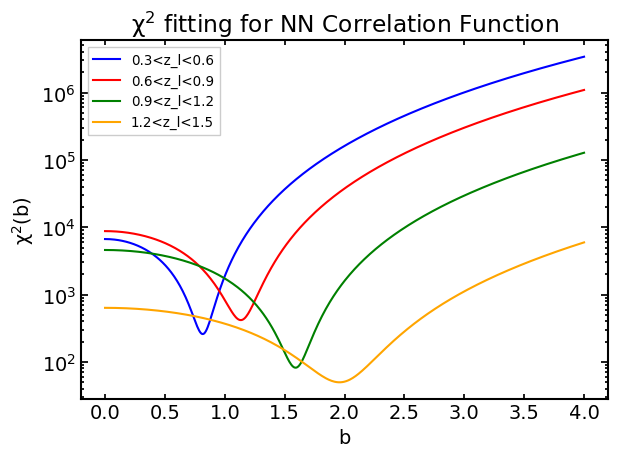

In [12]:
nn_min_b_diag, nn_min_chi_diag = cs.get_chi_sq_plots('NN', pz_ranges[1:-2], 'diag')

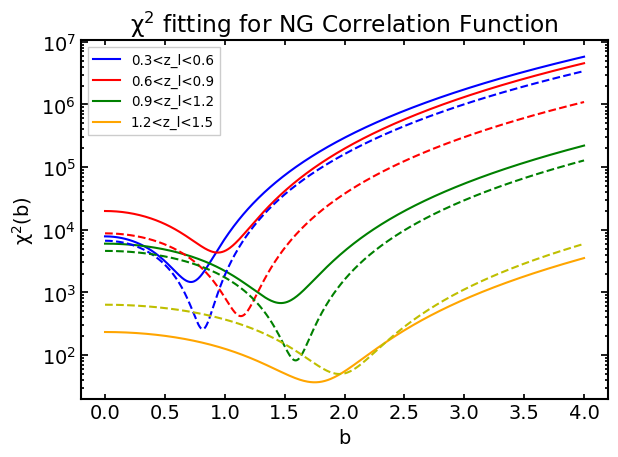

In [13]:
compare_chi_sq('NN', pz_ranges[1:-2])

In [14]:
def min_b_comp_mod(corr, pz_range, fig_size, min_b_full, min_b_diag):
    fig, ax = plt.subplots(len(pz_range), 2, figsize=fig_size)
    for i in range(len(pz_range)):
        b = min_b_full[i]
        title = '{:.1f}<z_l<{:.1f}, b={:.2f}'.format(pz_range[i], pz_range[i]+0.3, b)
        ax[i][0].set_title(title)
        ax[i][1].set_title(title)
        r_data, xi_data, xi_sig, cov = cs.get_data(corr, i, cov_prpt='full')
        r_theo, xi_theo = cs.get_theo(corr, i)
        f = interpolate.interp1d(r_theo, xi_theo)
        xi_theo_interp = f(r_data)
        if (corr == 'NG'):
            xi_model = b*xi_theo_interp
        elif (corr == 'NN'):
            xi_model = (b**2)*xi_theo_interp
            
        cs.plot_xi_mod('scatter', ax[i][0], r_data, xi_data, 'Data', 'blue', xi_sig)
        cs.plot_xi_mod('plot', ax[i][0], r_theo, xi_theo, 'Theory', 'red')
        cs.plot_xi_mod('plot', ax[i][0], r_data, xi_model, 'Model', 'green')
        
        cs.plot_xi('scatter', ax[i][1], r_data, xi_data, 'Data', 'blue', xi_sig)
        cs.plot_xi('plot', ax[i][1], r_theo, xi_theo, 'Theory', 'red')
        cs.plot_xi('plot', ax[i][1], r_data, xi_model, 'Model', 'green')
        ax[i][1].legend()
    for j in range(len(pz_range)):
        b = min_b_diag[j]
        r_data, xi_data, xi_sig, cov = cs.get_data(corr, j, cov_prpt='diag')
        r_theo, xi_theo = cs.get_theo(corr, j)
        f = interpolate.interp1d(r_theo, xi_theo)
        xi_theo_interp = f(r_data)
        if (corr == 'NG'):
            xi_model = b*xi_theo_interp
        elif (corr == 'NN'):
            xi_model = (b**2)*xi_theo_interp
            
        cs.plot_xi_mod('plot', ax[j][0], r_data, xi_model, 'Model', 'g--')
        cs.plot_xi('plot', ax[j][1], r_data, xi_model, 'Model', 'g--')
    return

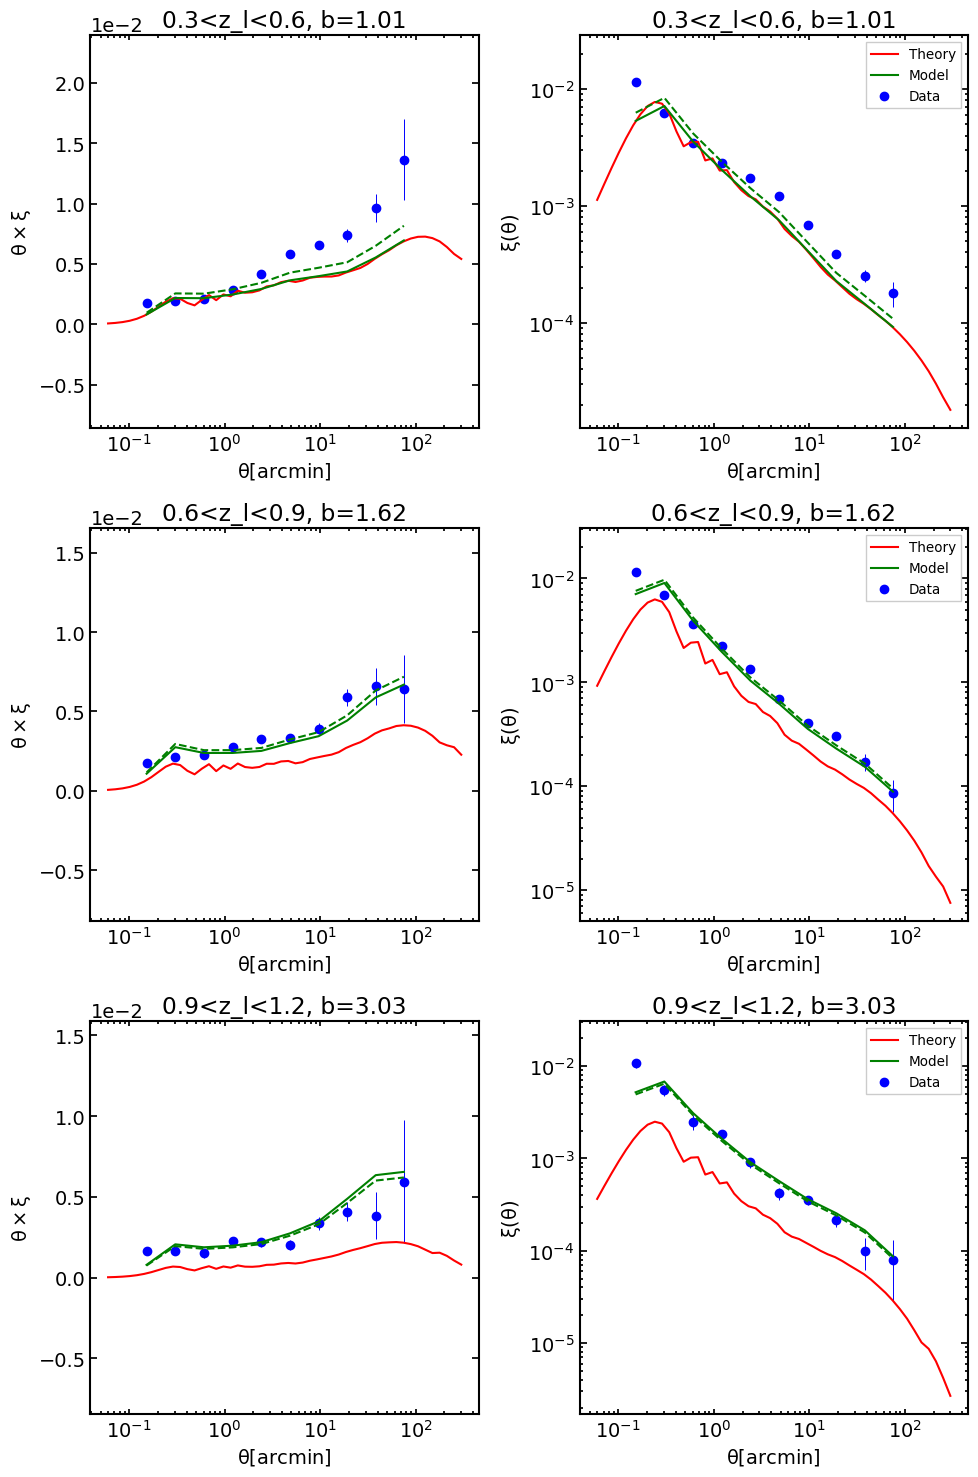

In [15]:
min_b_comp_mod('NG', pz_ranges[1:-3], (10, 15), ng_min_b_full, ng_min_b_diag)

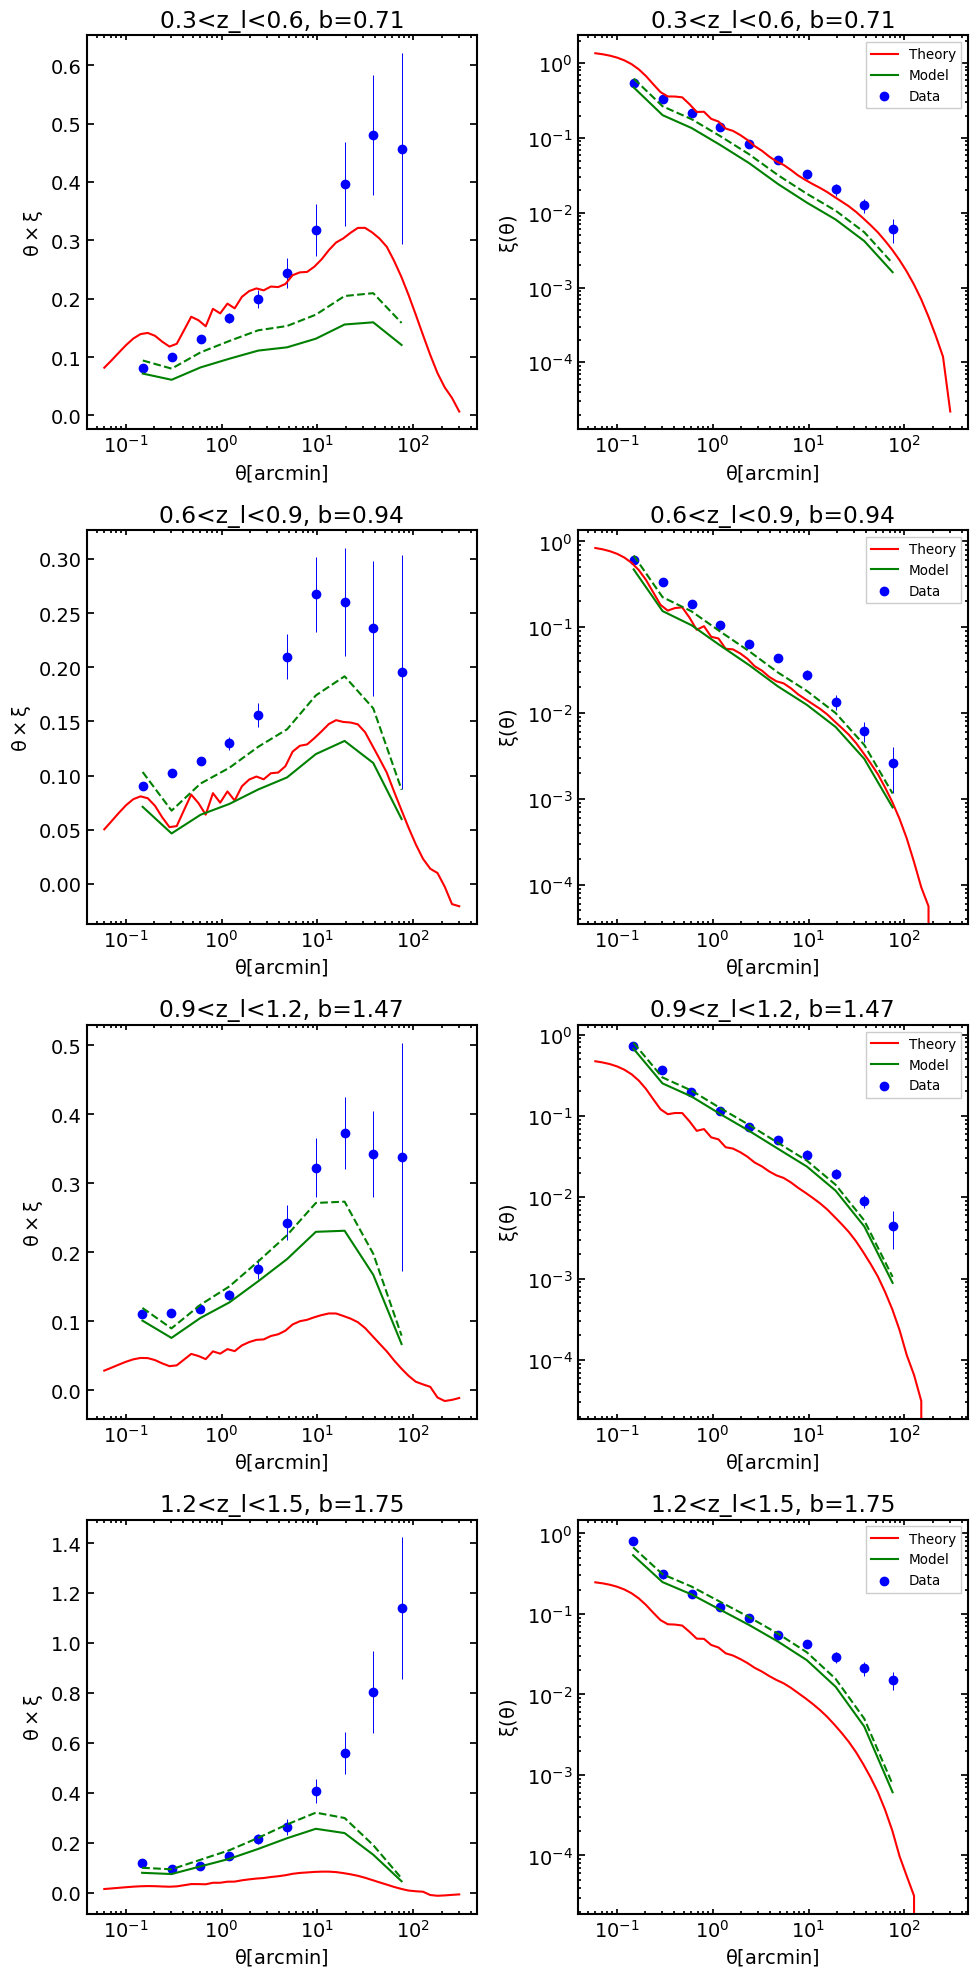

In [16]:
min_b_comp_mod('NN', pz_ranges[1:-2], (10, 20), nn_min_b_full, nn_min_b_diag)

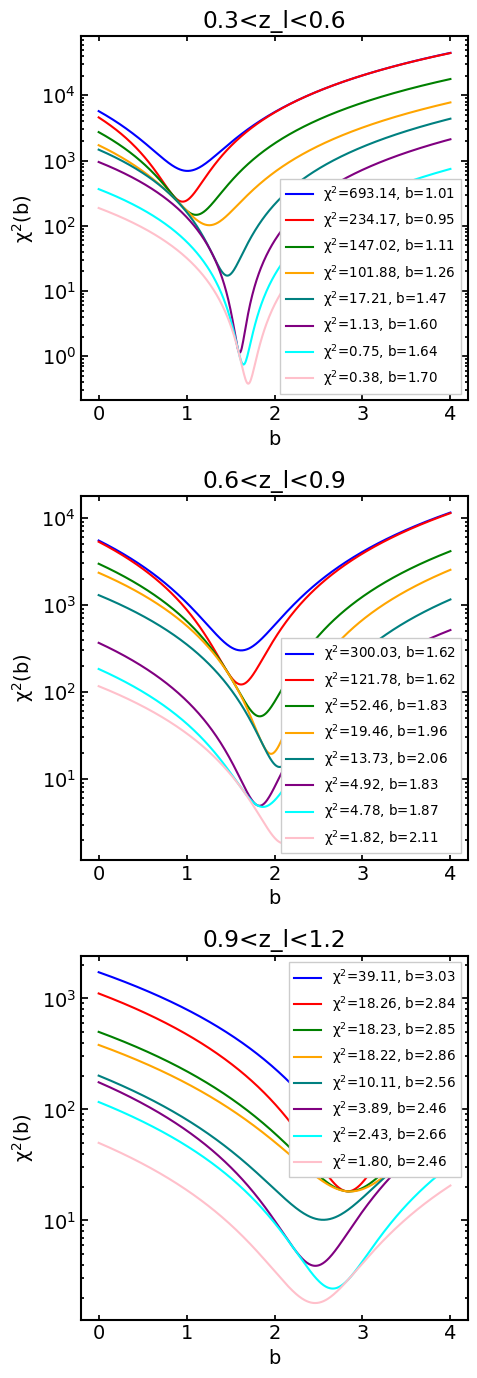

In [17]:
ng_min_b_new_full, ng_min_chi_new_full = cs.pop('NG', pz_ranges[1:-3], 'full', (5, 14))

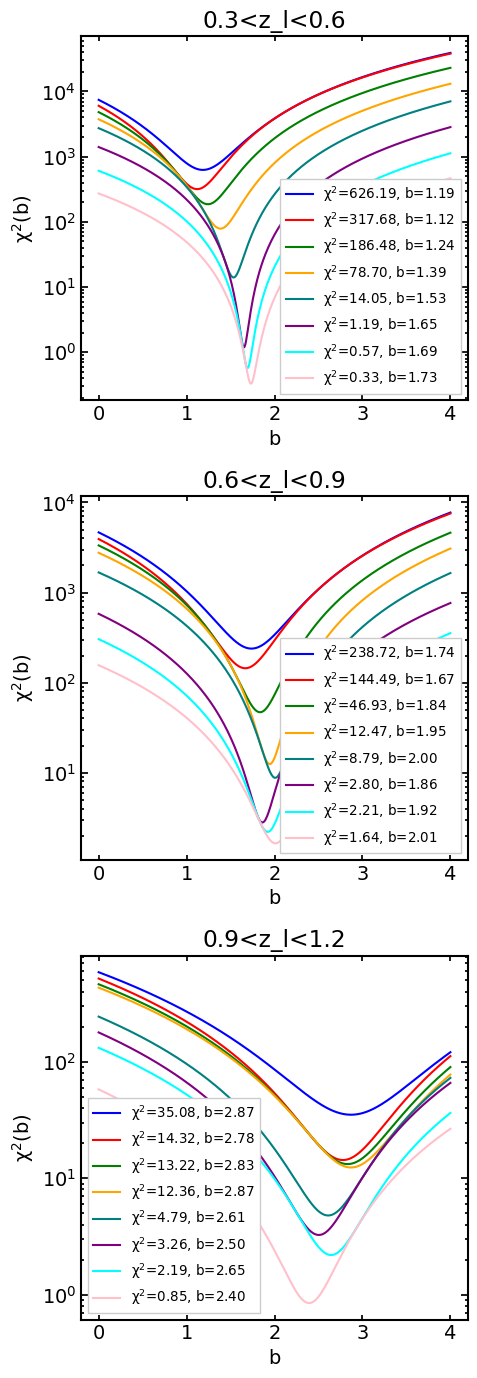

In [18]:
ng_min_b_new_diag, ng_min_chi_new_diag = cs.pop('NG', pz_ranges[1:-3], 'diag', (5, 14))

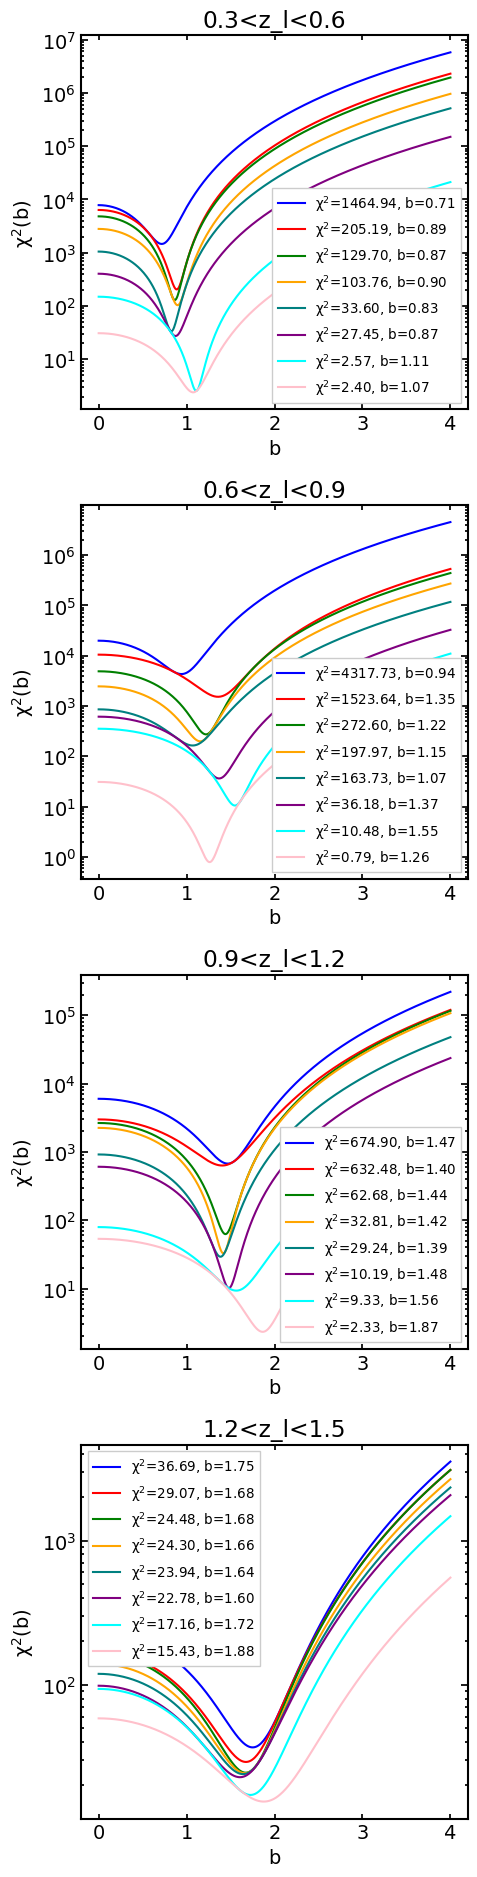

In [19]:
nn_min_b_new_full, nn_min_chi_new_full = cs.pop('NN', pz_ranges[1:-2], 'full', (5, 19))

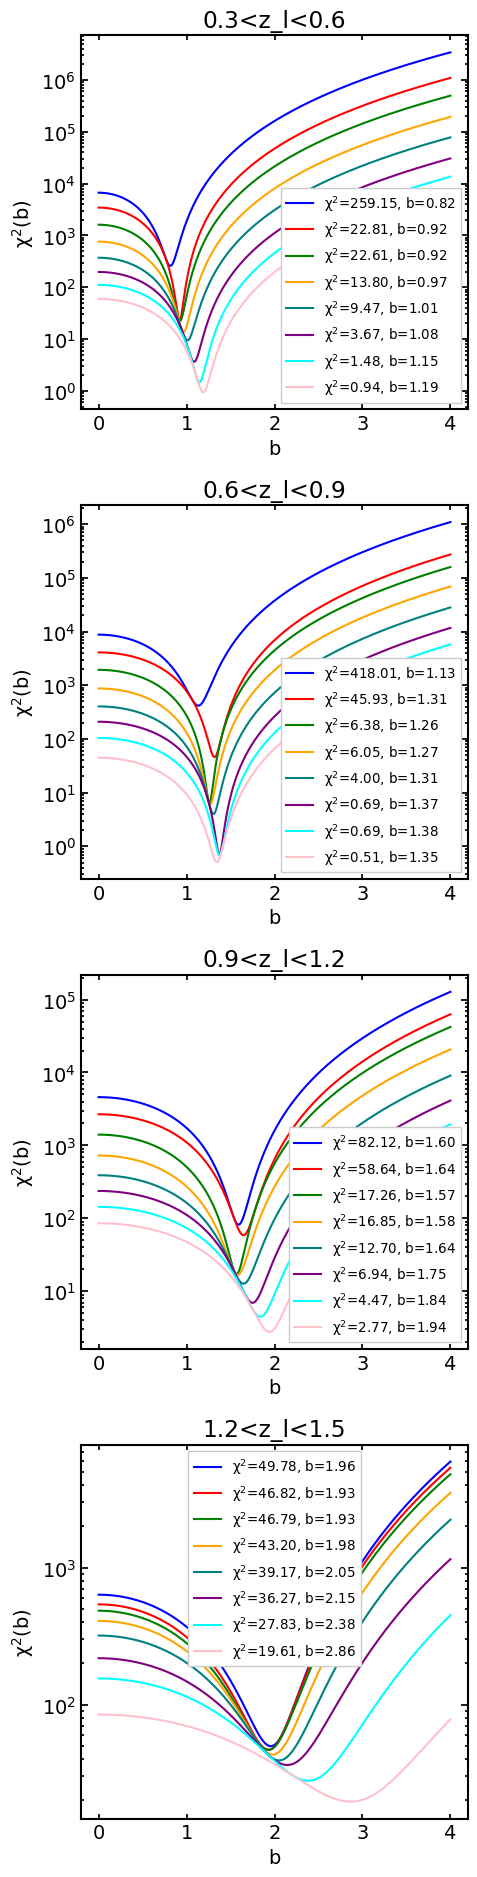

In [20]:
nn_min_b_new_diag, nn_min_chi_new_diag = cs.pop('NN', pz_ranges[1:-2], 'diag', (5, 19))

In [21]:
ng_r_min_pos = [3, 2, 0]
nn_r_min_pos = [4, 5, 2, 0]

In [22]:
### Criteria: first combi that brings chi^2 below 100 ###
def make_min_b_arr(corr, cov_prpt):
    if (corr == 'NG'):
        r_min_pos = ng_r_min_pos
        if (cov_prpt == 'full'):
            min_b_new = ng_min_b_new_full
            min_chi_new = ng_min_chi_new_full
        elif (cov_prpt == 'diag'):
            min_b_new = ng_min_b_new_diag
            min_chi_new = ng_min_chi_new_diag
    elif (corr == 'NN'):
        r_min_pos = nn_r_min_pos
        if (cov_prpt == 'full'):
            min_b_new = nn_min_b_new_full
            min_chi_new = nn_min_chi_new_full
        elif (cov_prpt == 'diag'):
            min_b_new = nn_min_b_new_diag
            min_chi_new = nn_min_chi_new_diag
    min_bs = np.zeros(len(r_min_pos))
    min_chis = np.zeros(len(r_min_pos))
    for i in range(len(r_min_pos)):
        min_bs[i] = min_b_new[i, r_min_pos[i]]
        min_chis[i] = min_chi_new[i, r_min_pos[i]]
    return min_bs, min_chis


ng_min_b_arr_full, ng_min_chi_arr_full = make_min_b_arr('NG', 'full')
ng_min_b_arr_diag, ng_min_chi_arr_diag = make_min_b_arr('NG', 'diag')
nn_min_b_arr_full, nn_min_chi_arr_full = make_min_b_arr('NN', 'full')
nn_min_b_arr_diag, nn_min_chi_arr_diag = make_min_b_arr('NN', 'diag')

In [77]:
def red_arr(arr, start, dim):
    '''
    Reduce array, position of start becomes first element.
    dim = 1 or 2
    '''
    for i in range(start):
        for j in range(dim):
            arr = np.delete(arr, 0, j)
    return arr

In [78]:
a=np.arange(100).reshape(10, 10)

In [79]:
b = red_arr(a, 7, 2)

In [80]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [81]:
b

array([[77, 78, 79],
       [87, 88, 89],
       [97, 98, 99]])

In [91]:
def min_b_comp_new(corr, pz_range, r_min_pos, min_b_full, min_b_diag, fig_size):
    '''
    Plot theta vs. xi, theta vs. theta*xi for the new b value. NG corr

    Parameters
    ----------
    corr : str
        'NG', 'NN'
    pz_range : arr
        Segment of pz_ranges.
    min_b : arr
        new b values that corresponds to minimum chi_sq.
    r_min_pos : arr
        position of first unpopped point.
    cov_prpt : str
        'full', 'diag'

    Returns
    -------
    None.

    '''
    fig, ax = plt.subplots(len(pz_range), 2, figsize=fig_size)
    #plot full
    for i in range(len(pz_range)):
        b = min_b_full[i]
        
        print('{}:{:.1f}<z_l<{:.1f}:FULL'.format(corr, pz_range[i], pz_range[i]+0.3))
        r_data_all, xi_data_all, xi_sig_all, cov_all = cs.get_data(corr, i, cov_prpt='full')
        r_data = red_arr(r_data_all, r_min_pos[i], 1)
        xi_data = red_arr(xi_data_all, r_min_pos[i], 1)
        xi_sig = red_arr(xi_sig_all, r_min_pos[i], 1)
        cov = red_arr(cov_all, r_min_pos[i], 2)
        print('theta=', r_data)
        print('xi_data=', xi_data)
        print('error=', xi_sig)
        print('covariance=', cov)
        r_theo, xi_theo = cs.get_theo(corr, i)
        f = interpolate.interp1d(r_theo, xi_theo)
        xi_theo_interp = f(r_data)
        if (corr == 'NG'):
            xi_model = b*xi_theo_interp
            print('xi_model=', xi_model)
        elif (corr == 'NN'):
            xi_model = (b**2)*xi_theo_interp
            print('xi_model=', xi_model)
        
        chi_sq = cs.get_chi_sq(xi_data, xi_model, cov)
        chi_sq_dof = chi_sq/(10-r_min_pos[i]-1)
        title = r'{:.1f}<z_l<{:.1f}, $\chi^2/dof$ full={:.2f}'.format(pz_range[i], pz_range[i]+0.3, chi_sq_dof)
        ax[i][0].set_title(title)
        
        cs.plot_xi_mod('scatter', ax[i][0], r_data_all, xi_data_all, 'Data', 'blue',  xi_sig_all)
        cs.plot_xi_mod('plot', ax[i][0], r_theo, xi_theo, 'Theory', 'red')
        cs.plot_xi_mod('plot', ax[i][0], r_data, xi_model, 'Model', 'green')
        #ax[i][0].axvline(x=r_data[r_min_pos[i]])
        
        cs.plot_xi('scatter', ax[i][1], r_data_all, xi_data_all, 'Data', 'blue', xi_sig_all)
        cs.plot_xi('plot', ax[i][1], r_theo, xi_theo, 'Theory', 'red')
        cs.plot_xi('plot', ax[i][1], r_data, xi_model, 'Model', 'green')
        #ax[i][1].axvline(x=r_data[r_min_pos[i]])
        ax[i][1].legend()
    #plot diag
    for j in range(len(pz_range)):
        b = min_b_diag[j]
        
        print('{}:{:.1f}<z_l<{:.1f}:DIAG'.format(corr, pz_range[j], pz_range[j]+0.3))
        r_data_all, xi_data_all, xi_sig_all, cov_all = cs.get_data(corr, j, cov_prpt='diag')
        r_data = red_arr(r_data_all, r_min_pos[j], 1)
        xi_data = red_arr(xi_data_all, r_min_pos[j], 1)
        xi_sig = red_arr(xi_sig_all, r_min_pos[j], 1)
        cov = red_arr(cov_all, r_min_pos[j], 2)
        print('theta=', r_data)
        print('xi_data=', xi_data)
        print('error=', xi_sig)
        print('covariance=', cov)
        r_theo, xi_theo = cs.get_theo(corr, j)
        f = interpolate.interp1d(r_theo, xi_theo)
        xi_theo_interp = f(r_data)
        if (corr == 'NG'):
            xi_model = b*xi_theo_interp
            print('xi_model=', xi_model)
        elif (corr == 'NN'):
            xi_model = (b**2)*xi_theo_interp
            print('xi_model=', xi_model)
        
        chi_sq = cs.get_chi_sq(xi_data, xi_model, cov)
        chi_sq_dof = chi_sq/(10-r_min_pos[j]-1)
        title = r'b={:.2f}, $\xi^2/dof$ diag={:.2f}'.format(b, chi_sq_dof)
        ax[j][1].set_title(title)
        
        cs.plot_xi_mod('plot', ax[j][0], r_data, xi_model, 'Model', 'g--')
        cs.plot_xi('plot', ax[j][1], r_data, xi_model, 'Model', 'g--')
    
    return

NG:0.3<z_l<0.6:FULL
theta= [ 1.21244623  2.41898976  4.82543072  9.62342278 19.1767767  38.11851035
 75.21870976]
xi_data= [0.0023308  0.0017222  0.0012117  0.00068212 0.000385   0.00025326
 0.00018111]
error= [7.3373e-05 4.7234e-05 4.2915e-05 3.7278e-05 2.8150e-05 3.0568e-05
 4.4455e-05]
covariance= [[ 5.38366038e-09  1.74951779e-09  1.34785485e-09  1.27720157e-09
   7.79651753e-10  4.72642710e-11 -4.00558017e-11]
 [ 1.74951779e-09  2.23102407e-09  1.19453282e-09  7.89544060e-10
   4.47162647e-10  2.75210278e-10  2.91304739e-10]
 [ 1.34785485e-09  1.19453282e-09  1.84168220e-09  1.11656889e-09
   5.92299742e-10  4.70526110e-10  8.37312475e-10]
 [ 1.27720157e-09  7.89544060e-10  1.11656889e-09  1.38964163e-09
   8.37986904e-10  4.26081315e-10  4.36094060e-10]
 [ 7.79651753e-10  4.47162647e-10  5.92299742e-10  8.37986904e-10
   7.92440099e-10  5.22124553e-10  3.82149163e-10]
 [ 4.72642710e-11  2.75210278e-10  4.70526110e-10  4.26081315e-10
   5.22124553e-10  9.34425643e-10  1.01750865e-

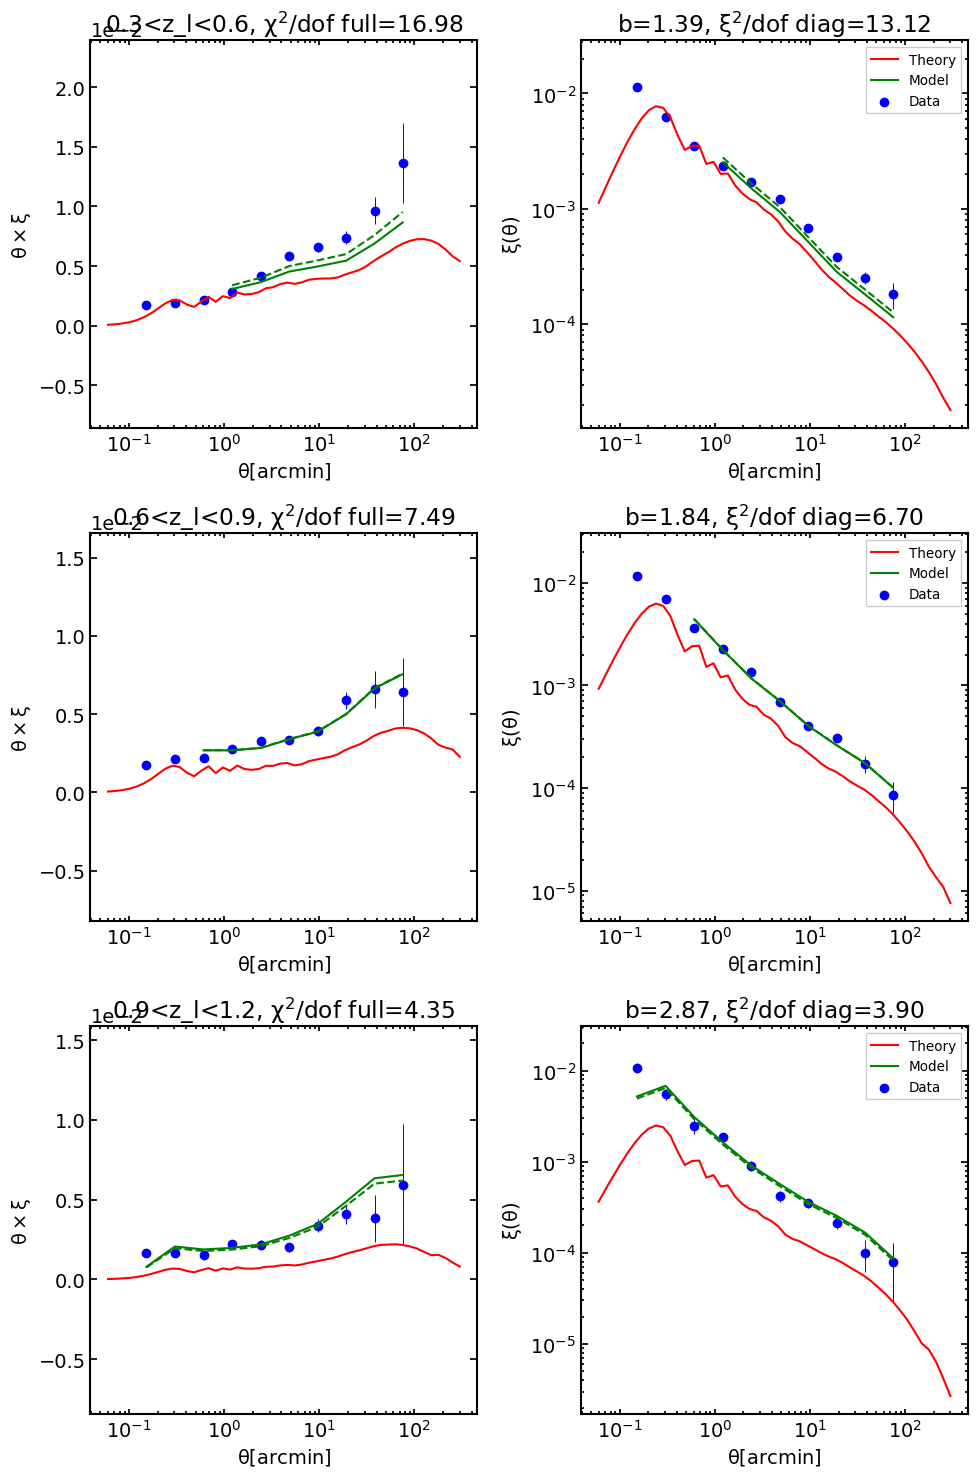

In [92]:
min_b_comp_new('NG', pz_ranges[1:-3], ng_r_min_pos, 
               ng_min_b_arr_full, ng_min_b_arr_diag, 
               (10, 15))

NN:0.3<z_l<0.6:FULL
theta= [ 2.4128292   4.81771621  9.61668874 19.16527408 38.09945585 75.20366752]
xi_data= [0.082704  0.050638  0.033031  0.020682  0.0126    0.0060784]
error= [0.0062704 0.0054497 0.0046088 0.0037742 0.0027037 0.0021738]
covariance= [[3.93181888e-05 3.38554361e-05 2.82340304e-05 2.21242221e-05
  1.30767801e-05 7.12247719e-06]
 [3.38554361e-05 2.96988261e-05 2.49142810e-05 1.94555833e-05
  1.11971962e-05 5.98149030e-06]
 [2.82340304e-05 2.49142810e-05 2.12411367e-05 1.68509005e-05
  9.89983958e-06 5.27058776e-06]
 [2.21242221e-05 1.94555833e-05 1.68509005e-05 1.42445684e-05
  9.22068814e-06 5.28605272e-06]
 [1.30767801e-05 1.11971962e-05 9.89983958e-06 9.22068814e-06
  7.30981149e-06 4.85155808e-06]
 [7.12247719e-06 5.98149030e-06 5.27058776e-06 5.28605272e-06
  4.85155808e-06 4.72544749e-06]]
xi_model= [0.06161347 0.03241848 0.01830066 0.01088259 0.00560546 0.00214849]
NN:0.6<z_l<0.9:FULL
theta= [ 4.81964368  9.6147656  19.16144141 38.11088741 75.24127876]
xi_data= 

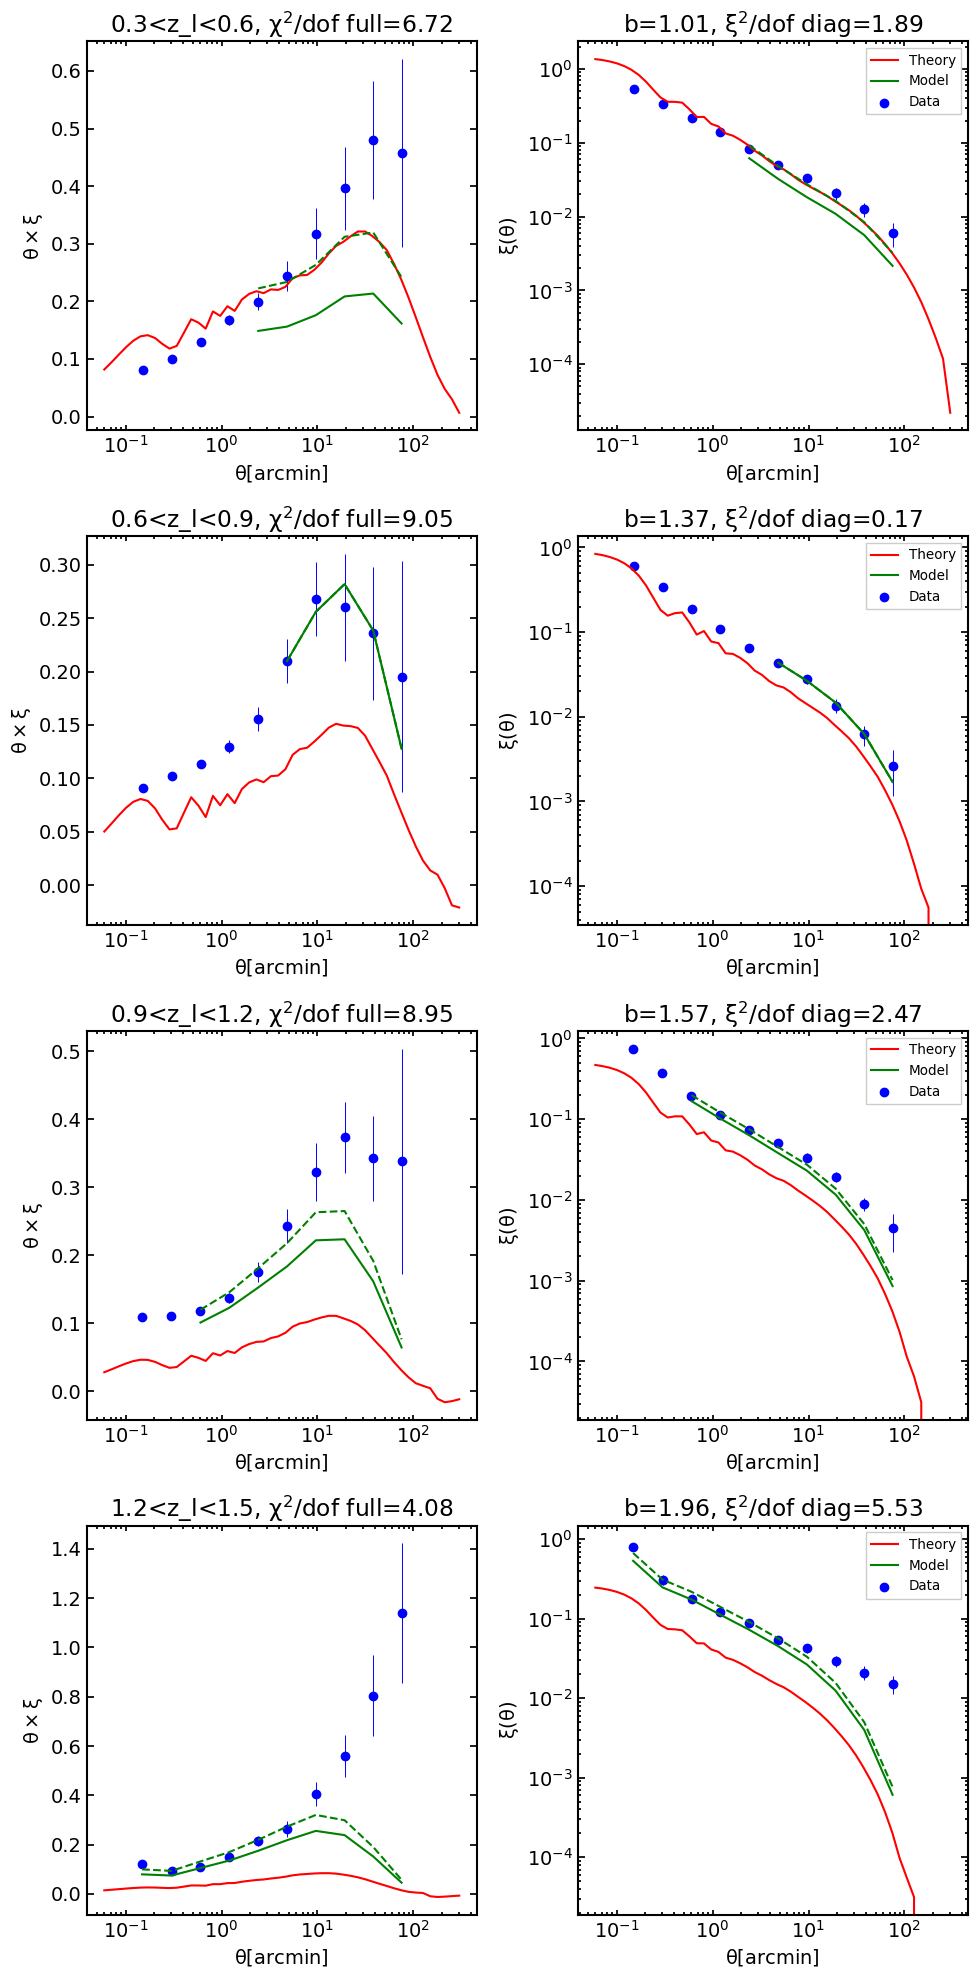

In [93]:
min_b_comp_new('NN', pz_ranges[1:-2], nn_r_min_pos, 
               nn_min_b_arr_full, nn_min_b_arr_diag, 
               (10, 20))